# Simultaneous diophantine approximations and multidimensional continued fraction algorithms

Sébastien Labbé, Sage Days 79, Jerusalem, November 22, 2016

## Outline

 1. Diophantine Approximations & Continued Fractions in Sage
 2. Simultaneous Diophantine Approximations & Multidimensional Continued Fractions using slabbe optional Sage package
 3. 3-dimensional Continued Fraction Algorithms Cheat Sheets http://arxiv.org/abs/1511.08399
 4. Dealing with TikzPicture with slabbe package

# 1. Diophantine Approximations & Continued Fractions in Sage


## Diophantine Approximation

**Theorem (Dirichlet, 1842)** Let $\alpha,Q\in\mathbb{R}$ such that $Q>1$. Then there exist integers $p,q$ such that $1\leq q<Q$ and $$\left|\alpha q-p\right|\leq {1\over Q}$$.

**Corollary** If $\alpha\in\mathbb{R}\setminus\mathbb{Q}$, then there are infinitely many pairs $(p,q)$ of coprime integers such that
$$\left|\alpha - {p\over q}\right|<{1\over q^2}.$$

In [23]:
def diophantine_approx(alpha, Q):
    for q in range(1, Q):
        if frac(alpha*q) <= 1./Q or 1-1./Q <= frac(alpha*q):
            p = round(alpha*q)
            return (p,q)

In [4]:
%display latex # output in latex

In [26]:
diophantine_approx(pi, 10)

(22, 7)

In [27]:
n(22/7 - pi)

0.00126448926734968

In [28]:
diophantine_approx(pi, 100)

(22, 7)

In [29]:
diophantine_approx(pi, 200)

(355, 113)

Finding the next convergent takes time:

In [30]:
%time diophantine_approx(pi, 30000)

CPU times: user 155 ms, sys: 3.24 ms, total: 158 ms
Wall time: 178 ms


(355, 113)

In [31]:
%time diophantine_approx(pi, 35000)

KeyboardInterrupt: 

## Continued fractions in Sage

Using continued fraction finds it fast:

In [2]:
cf_pi = continued_fraction(pi)
cf_pi

[3; 7, 15, 1, 292, 1, 1, 1, 2, 1, 3, 1, 14, 2, 1, 1, 2, 2, 2, 2, ...]

In [5]:
latex(cf_pi[:25])

3+ \frac{\displaystyle 1}{\displaystyle 7+ \frac{\displaystyle 1}{\displaystyle 15+ \frac{\displaystyle 1}{\displaystyle 1+ \frac{\displaystyle 1}{\displaystyle 292+ \frac{\displaystyle 1}{\displaystyle 1+ \frac{\displaystyle 1}{\displaystyle 1+ \frac{\displaystyle 1}{\displaystyle 1+ \frac{\displaystyle 1}{\displaystyle 2+ \frac{\displaystyle 1}{\displaystyle 1+ \frac{\displaystyle 1}{\displaystyle 3+ \frac{\displaystyle 1}{\displaystyle 1+ \frac{\displaystyle 1}{\displaystyle 14+ \frac{\displaystyle 1}{\displaystyle 2+ \frac{\displaystyle 1}{\displaystyle 1+ \frac{\displaystyle 1}{\displaystyle 1+ \frac{\displaystyle 1}{\displaystyle 2+ \frac{\displaystyle 1}{\displaystyle 2+ \frac{\displaystyle 1}{\displaystyle 2+ \frac{\displaystyle 1}{\displaystyle 2+ \frac{\displaystyle 1}{\displaystyle 1+ \frac{\displaystyle 1}{\displaystyle 84+ \frac{\displaystyle 1}{\displaystyle 2+ \frac{\displaystyle 1}{\displaystyle 2}}}}}}}}}}}}}}}}}}}}}}}

In [35]:
L = cf_pi.convergents()
L[:20].list()

[3,
 22/7,
 333/106,
 355/113,
 103993/33102,
 104348/33215,
 208341/66317,
 312689/99532,
 833719/265381,
 1146408/364913,
 4272943/1360120,
 5419351/1725033,
 80143857/25510582,
 165707065/52746197,
 245850922/78256779,
 411557987/131002976,
 1068966896/340262731,
 2549491779/811528438,
 6167950454/1963319607,
 14885392687/4738167652]

In [36]:
numerical_approx(pi - 103993/33102)

5.77890624242627e-10

In [37]:
numerical_approx(1/33102^2)

9.12623255565822e-10

# 2. Simultaneous Diophantine Approximations & Multidimensional Continued Fractions using slabbe optional Sage package

## Simultaneous Diophantine Approximation

**Theorem (Dirichlet, 1842)** Let $\alpha_1,\dots,\alpha_d\in\mathbb{R}$ and $Q>1$ an integer. Then there exist integers $p_1,\dots,p_d,q$ such that $1\leq q<Q^d$ and $$|\alpha_i q-p_i|\leq {1\over Q}\quad\text{ for all } 1\leq i\leq d.$$

**Corollary** If at least one of the $\alpha_1,\dots,\alpha_d$ is irrational, then there exist infinitely many $(d+1)$-uplet $(p_1,\dots,p_d,q)$ such that
$$\left|\alpha_i - {p_i\over q}\right| < {1\over q^{1+\frac{1}{d}}}\quad\text{ for all } 1\leq i\leq d.$$

## slabbe optional package

Installation:

    sage -pip install slabbe

Last month, I coded this (it will be available in the next release of slabbe package):

In [38]:
from slabbe.diophantine_approx import best_simultaneous_convergents

It uses Cython code and computations are done in parallel on all the available cpus:

In [39]:
from itertools import islice

In [41]:
it = best_simultaneous_convergents([e,pi])
%time [(p1,p2,q) for p1,p2,q in islice(it,18)]

CPU times: user 133 ms, sys: 118 ms, total: 251 ms
Wall time: 5.75 s


[(3, 3, 1),
 (19, 22, 7),
 (1843, 2130, 678),
 (51892, 59973, 19090),
 (113018, 130618, 41577),
 (114861, 132748, 42255),
 (166753, 192721, 61345),
 (446524, 516060, 164267),
 (1174662, 1357589, 432134),
 (3970510, 4588827, 1460669),
 (21640489, 25010505, 7961091),
 (25610999, 29599332, 9421760),
 (47251488, 54609837, 17382851),
 (117318127, 135587768, 43158927),
 (142929126, 165187100, 52580687),
 (164569615, 190197605, 60541778),
 (307498741, 355384705, 113122465),
 (779567097, 900967015, 286786708)]

## Multidimensional continued fraction algorithms
A *Multidimensional Continued Fraction (MCF) algorithm* is a function
$$
\begin{array}{rrcl}
F: & \Lambda & \to     & \Lambda\\
   & x       & \mapsto & M(x)^{-1}\cdot x.
\end{array}
$$
where $\Lambda\subset\mathbb{R}^d$ is a cone and $M:\Lambda\to SL(d,\mathbb{N})$ is
 - an homogeneous  function of degree $0$: $M(\alpha x)=M(x)$ for all $\alpha\in\mathbb{R}$,
 - piecewise constant on a partition of $\Lambda$ into subcones.
 
Classical references are Schweiger 2000, Brentjes 1981.

### Brun's algorithm (1958) subtracts the second largest entry to the largest
The positive cone $\Lambda=\mathbb{R}^3_+$ is partionned as
$\Lambda=\cup_{\pi\in\mathcal{S}_3}\Lambda_\pi$ where
$$
    \Lambda_\pi = \{(x_1,x_2,x_3)\in\Lambda\mid 
        x_{\pi 1}< x_{\pi 2}< x_{\pi 3}\}.
$$
Matrices are $M(\mathbf{x}) = M_\pi$ where
$$
\begin{array}{lll}
M_{123}={\left(\begin{array}{rrr}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 1 & 1
\end{array}\right)}
&
M_{132}={\left(\begin{array}{rrr}
1 & 0 & 0 \\
0 & 1 & 1 \\
0 & 0 & 1
\end{array}\right)}
&
M_{213}={\left(\begin{array}{rrr}
1 & 0 & 0 \\
0 & 1 & 0 \\
1 & 0 & 1
\end{array}\right)}
\\
M_{231}={\left(\begin{array}{rrr}
1 & 0 & 1 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{array}\right)}
&
M_{312}={\left(\begin{array}{rrr}
1 & 0 & 0 \\
1 & 1 & 0 \\
0 & 0 & 1
\end{array}\right)}
&
M_{321}={\left(\begin{array}{rrr}
1 & 1 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{array}\right)}
\\
\end{array}
$$
For example, if
$(x_1,x_2,x_3)\in\Lambda_{123}$, then
$$
F (x_1,x_2,x_3) = (x_1, x_2, x_3-x_2).
$$
In other words, it *subtracts the second largest entry to the largest*.


In [42]:
from slabbe.mult_cont_frac import Brun
F = Brun()

In [43]:
orbit = F.cone_orbit_list((10, 21, 37), 5)
[(x,y,z) for (x,y,z,_,_,_,_) in orbit]

[(10.0, 21.0, 16.0),
 (10.0, 5.0, 16.0),
 (10.0, 5.0, 6.0),
 (4.0, 5.0, 6.0),
 (4.0, 5.0, 1.0)]

In [ ]:
orbit = F.cone_orbit_list((e, pi, 1), 5)
[(x,y,z) for (x,y,z,_,_,_,_) in orbit]

### Associated cocycle and convergents
The algorithm $F$ defines a **cocycle** $M_n:\Lambda\to SL(d,\mathbb{Z})$
$$
    M_0(\mathbf{x}) = I 
    \quad
    \text{and}
    \quad
    M_n(\mathbf{x}) = 
    M(\mathbf{x})
    M(F\mathbf{x})
    M(F^2\mathbf{x})\cdots
    M(F^{n-1}\mathbf{x}).
$$
with the cocycle property $M_{m+n}(\mathbf{x})=M_m(\mathbf{x})M_n(F^m(\mathbf{x}))$.

In [44]:
[F.n_matrix((e,pi,1), i) for i in range(5,25)]

[
[3 3 2]  [6 3 2]  [6 3 8]  [ 6 11  8]  [ 6 19  8]  [ 6 19 27]
[3 4 2]  [7 4 2]  [7 4 9]  [ 7 13  9]  [ 7 22  9]  [ 7 22 31]
[1 1 1], [2 1 1], [2 1 3], [ 2  4  3], [ 2  7  3], [ 2  7 10],

[ 6 19 46]  [ 6 19 65]  [ 6 19 84]  [  6  19 103]  [109  19 103]
[ 7 22 53]  [ 7 22 75]  [ 7 22 97]  [  7  22 119]  [126  22 119]
[ 2  7 17], [ 2  7 24], [ 2  7 31], [  2   7  38], [ 40   7  38],

[109  19 212]  [109 231 212]  [109 443 212]  [109 655 212]
[126  22 245]  [126 267 245]  [126 512 245]  [126 757 245]
[ 40   7  78], [ 40  85  78], [ 40 163  78], [ 40 241  78],

[ 109  655  867]  [ 976  655  867]  [ 976  655 1843]  [ 976 2498 1843]
[ 126  757 1002]  [1128  757 1002]  [1128  757 2130]  [1128 2887 2130]
[  40  241  319], [ 359  241  319], [ 359  241  678], [ 359  919  678],

[3474 2498 1843]
[4015 2887 2130]
[1278  919  678]
]

## Do MCF algorithms finds all simultaneous best approximations?

In [45]:
from slabbe.diophantine_approx import best_simultaneous_convergents
from slabbe.diophantine_approx import mult_cont_frac_vs_dirichlet
from slabbe.mult_cont_frac import Brun,ARP,Reverse,Selmer,Cassaigne

In [46]:
v = [e, pi]
it = best_simultaneous_convergents(v)
dirichlet = [next(it) for _ in range(18)]
algos = [Brun(), ARP(), Reverse(), Selmer(),Cassaigne()]
mult_cont_frac_vs_dirichlet(v, dirichlet, algos)

Dirichlet,Brun,ARP,Reverse,Selmer,Cassaigne
,,,,,
,,,,,
,,,,,
,,,,,
,,,,,
,,,,,
,,,,,
,,,,,
,,,,,
,,,,,


# 3. 3-dimensional Continued Fraction Algorithms Cheat Sheets http://arxiv.org/abs/1511.08399

## MCF Algorithms as dynamical systems
To a MCF algorithm corresponds a **dynamical system** $(\Delta, f)$ defined by the projection of the map $F$ on a simplex $\Delta$:
$$
    f(\mathbf{x}) = \frac{F(\mathbf{x})}{\Vert F(\mathbf{x})\Vert}
    \qquad\text{ on }\qquad
    \Delta=\{\mathbf{x}\in\Lambda\mid\Vert\mathbf{x}\Vert=1\}.
$$
Below we illustrate some examples coming from :

## Cheat Sheets

Now we illustrate how to reproduce experimentations available in
http://arxiv.org/abs/1511.08399

using **slabbe Sage Optional Package** :

     sage -pip install slabbe

### Cylinders

In [52]:
from slabbe.mult_cont_frac import Brun
F = Brun()
cocycle = F.matrix_cocycle()
t = cocycle.tikz_n_cylinders(3, scale=3)
print repr(t)

\documentclass[tikz]{standalone}
\usepackage{amsmath}
\begin{document}
\begin{tikzpicture}
[scale=3]
\draw (0.0000, 0.0000) -- (-0.1443, 0.2500);
\draw (0.8660, -0.5000) -- (0.4330, -0.5000);
\draw (-0.1443, 0.2500) -- (-0.4330, 0.2500);
...
... 86 lines not printed (4293 characters in total) ...
...
\draw (0.0000, -0.2000) -- (0.1443, -0.2500);
\draw (-0.1732, 0.1000) -- (-0.4330, 0.2500);
\draw (-0.1732, -0.5000) -- (-0.2887, -0.5000);
\draw (-0.2887, -0.5000) -- (-0.3464, -0.2000);
\end{tikzpicture}
\end{document}


In [50]:
t.pdf()

'/Users/slabbe/.sage/temp/MacBook-de-Sebastien.local/430/tikz_UtHVV3.pdf'

### Invariant measure plot

In [53]:
%display default
%matplotlib inline

/Users/slabbe/Applications/sage-git/local/lib/python2.7/site-packages/traitlets/traitlets.py:770: DeprecationWarning: A parent of InlineBackend._config_changed has adopted the new @observe(change) API
  clsname, change_or_name), DeprecationWarning)


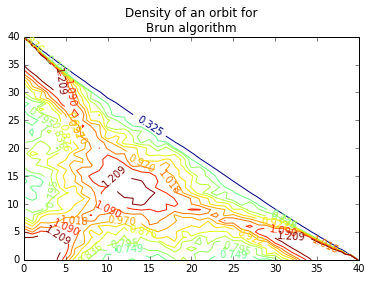

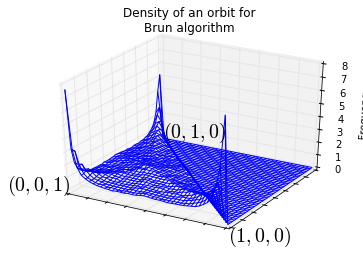

In [54]:
from slabbe.mult_cont_frac import Brun
F = Brun()
_ = F.invariant_measure_contour_plot(1000000, 40, norm='1')
_ = F.invariant_measure_wireframe_plot(1000000, 40, norm='1')

### Lyapunov exponents

In [55]:
F.lyapunov_exponents(n_iterations=10^8)

(0.3046175210118001, -0.1121744364633708, 1.368246829961647)

In [56]:
from slabbe.lyapunov import lyapunov_comparison_table

In [57]:
from slabbe.mult_cont_frac import Brun,ARP,Reverse,Selmer,Cassaigne
from slabbe.lyapunov import lyapunov_comparison_table
algos = [Brun(), ARP(), Reverse(), Selmer(),Cassaigne()]
lyapunov_comparison_table(algos, n_iterations=10^5)

Algorithm,\#Orbits,(std),(std),(std)
Arnoux-Rauzy-Poincar\'e,,0.443 (0.0051),-0.172 (0.0023),1.389 (0.0018)
Selmer,,0.183 (0.0023),-0.071 (0.0011),1.387 (0.0027)
Cassaigne,,0.182 (0.0027),-0.071 (0.0012),1.387 (0.0022)
Brun,,0.305 (0.0028),-0.112 (0.0013),1.368 (0.0020)
Reverse,,0.405 (0.0067),-0.103 (0.0019),1.255 (0.0017)


# 4. Dealing with TikzPicture with slabbe package

In [58]:
V = [[1,0,1],[1,0,0],[1,1,0],[0,0,-1],[0,1,0],[-1,0,0],[0,1,1],[0,0,1],[0,-1,0]]
P = Polyhedron(vertices=V).polar()
P

A 3-dimensional polyhedron in QQ^3 defined as the convex hull of 14 vertices (use the .plot() method to plot)

In [60]:
s = P.projection().tikz([674,108,-731],112)

In [62]:
type(s)

<class 'sage.misc.latex.LatexExpr'>

In [ ]:
view(s) # slow, sometimes broken...

In [63]:
from slabbe import TikzPicture
t = TikzPicture(s)
t

\documentclass[tikz]{standalone}
\usepackage{amsmath}
\begin{document}
\begin{tikzpicture}%
	[x={(0.249656cm, -0.577639cm)},
	y={(0.777700cm, -0.358578cm)},
	z={(-0.576936cm, -0.733318cm)},
	scale=2.000000,
...
... 80 lines not printed (4889 characters in total) ...
...
\node[vertex] at (1.00000, 1.00000, -1.00000)     {};
\node[vertex] at (1.00000, 1.00000, 1.00000)     {};
%%
%%
\end{tikzpicture}
\end{document}

In [67]:
from IPython.display import Image

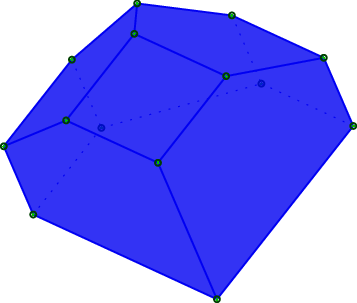

In [72]:
Image(t.png(view=False))

In [73]:
sage: S = FiniteSetMaps(5)
sage: I = S((0,1,2,3,4))
sage: a = S((0,1,3,0,0))
sage: b = S((0,2,4,1,0))
sage: roots = [I]
sage: succ = lambda v:[v*a,v*b,a*v,b*v]
sage: R = RecursivelyEnumeratedSet(roots, succ)
sage: G = R.to_digraph()
sage: G

Looped multi-digraph on 27 vertices (use the .plot() method to plot)

In [74]:
t = TikzPicture.from_graph(G)

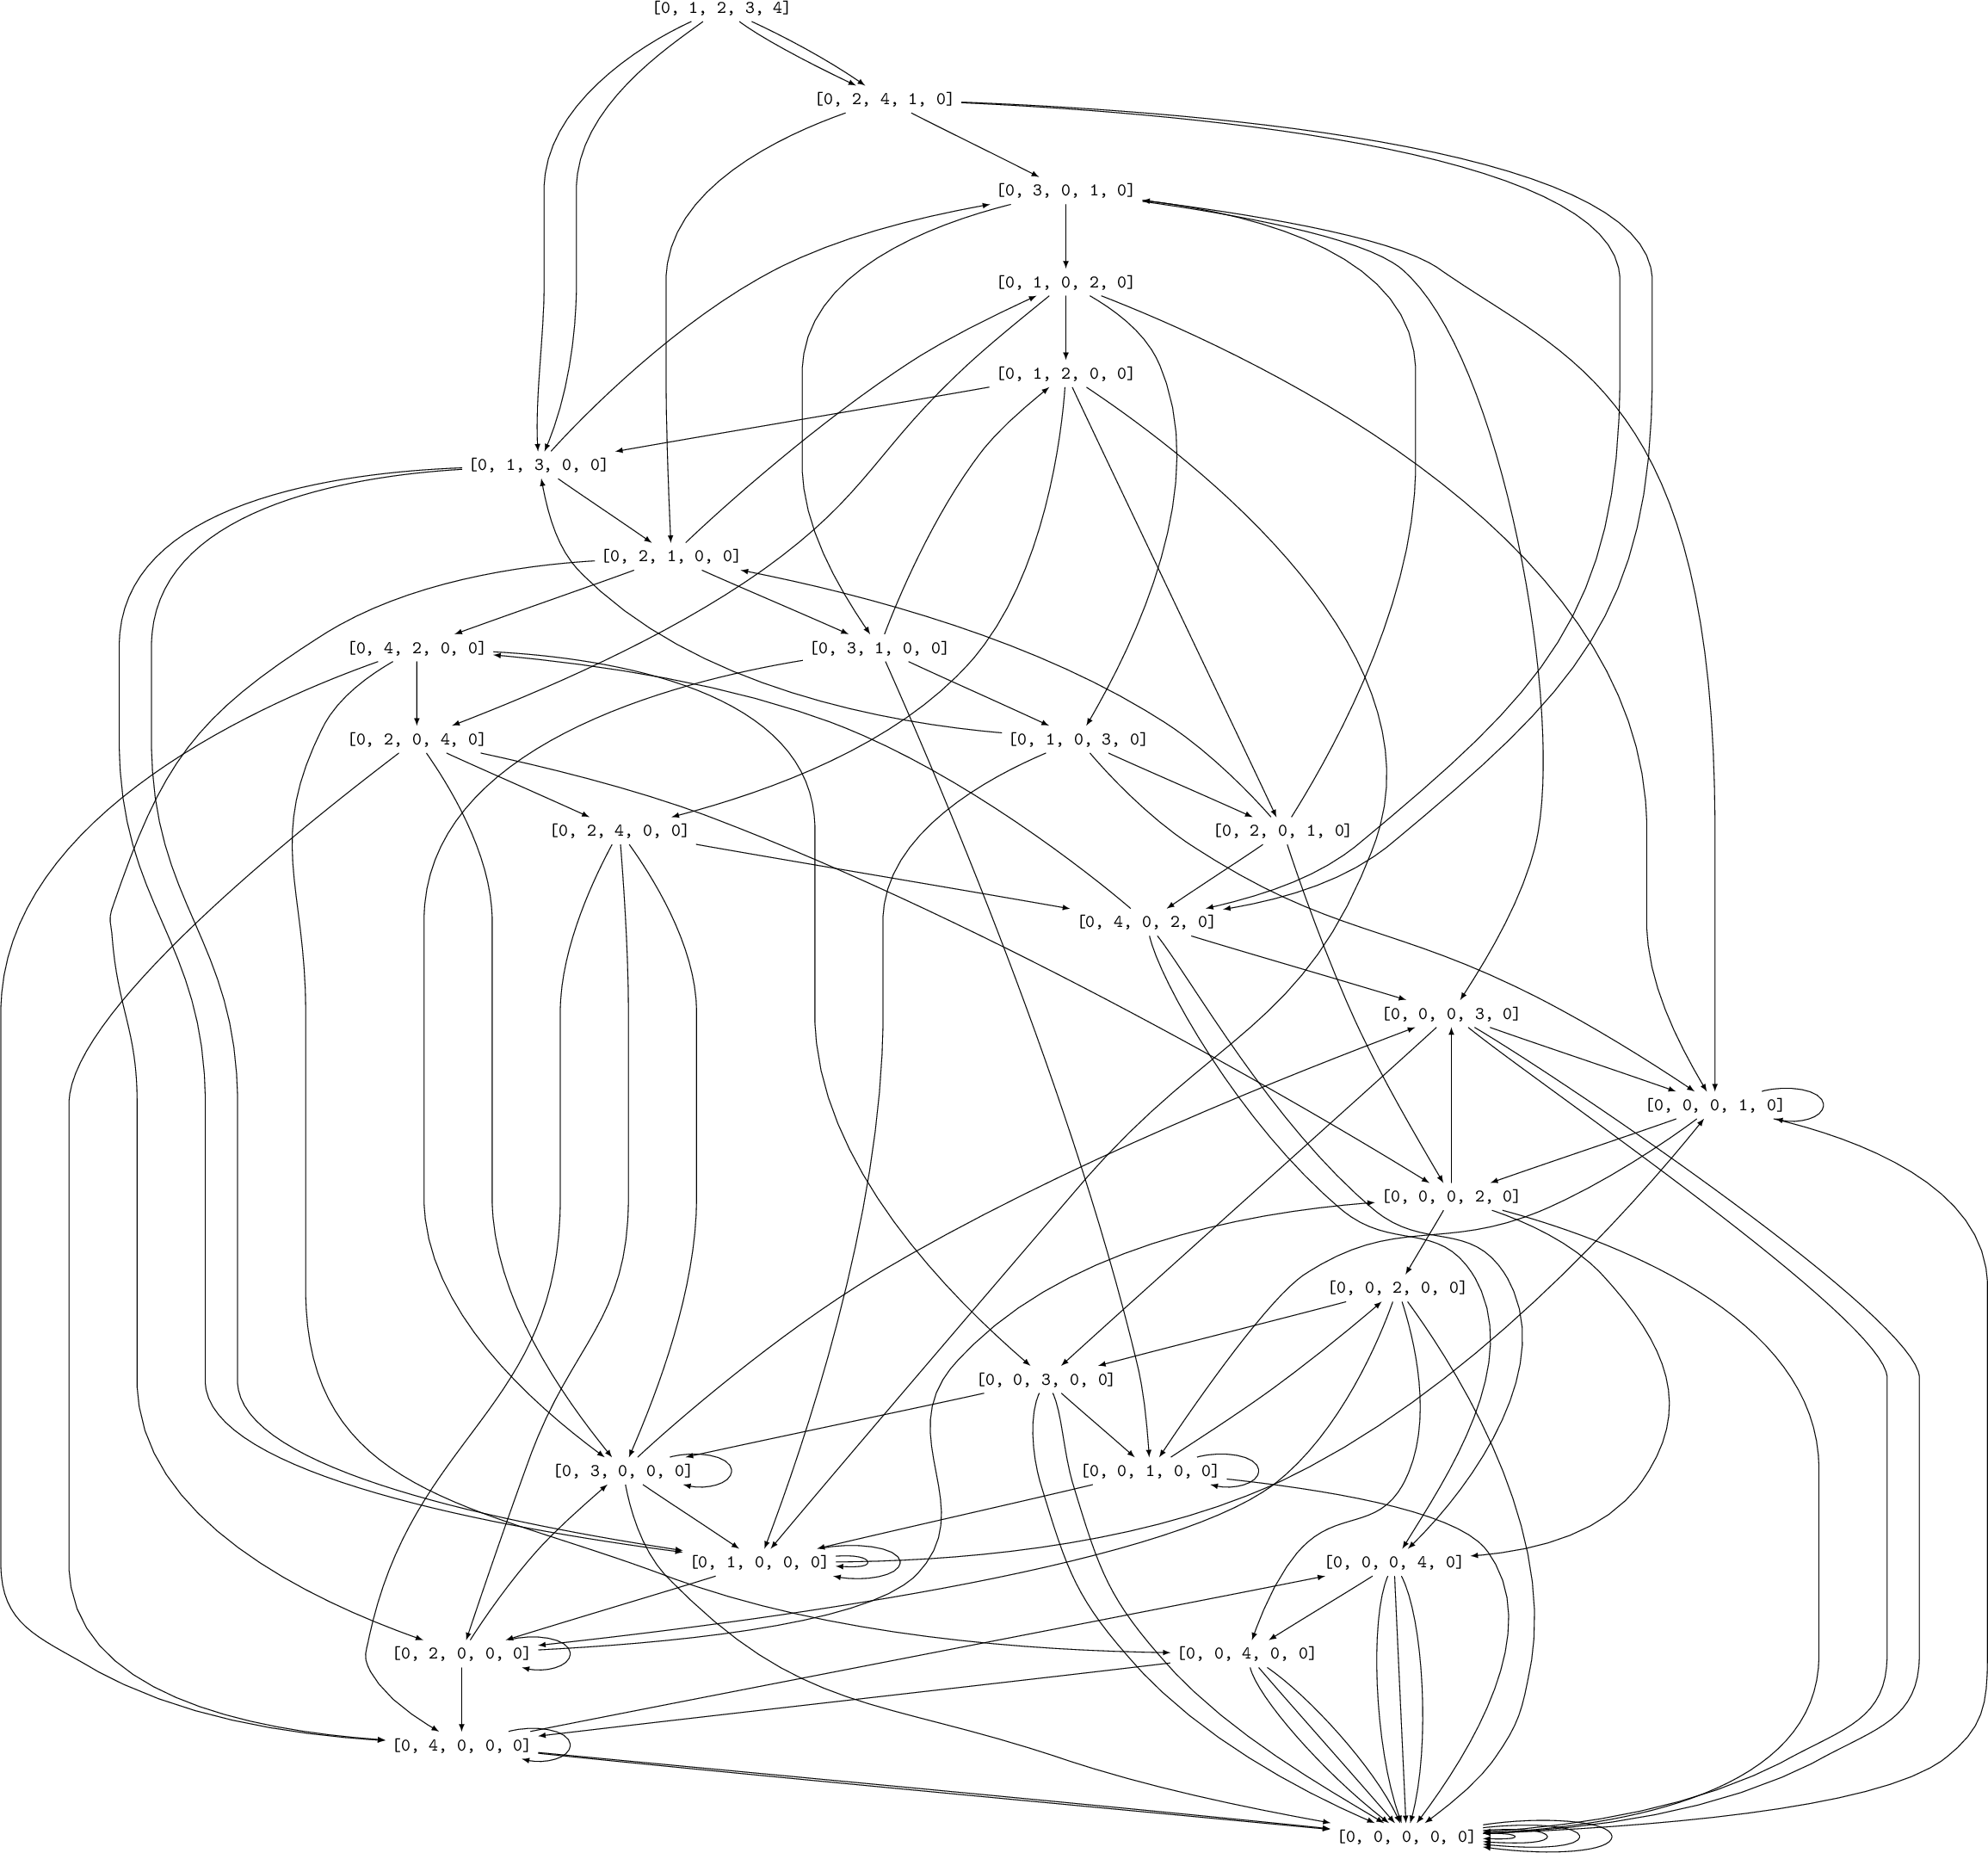

In [75]:
Image(t.png(view=False))

In [76]:
TikzPicture.from_graph?

In [78]:
TikzPicture?